In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mlt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Airlines_dataset_customer_satisfaction.csv')
data.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [3]:
data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [4]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
data.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
data.columns.str.replace(' ','_') 
#data.columns.str.replace('-','_')
#df.columns=df.columns.str.replace(' ','_')

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [7]:
data.isna().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             26
satisfaction                          0
dtype: int64

In [8]:
data.dropna()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,124365,Male,Loyal Customer,50,Business travel,Business,3599,3,3,3,...,5,5,5,5,5,5,4,12,24.0,satisfied
9996,22044,Male,Loyal Customer,38,Business travel,Business,3873,5,5,5,...,4,4,4,4,3,4,5,0,0.0,satisfied
9997,14057,Female,Loyal Customer,39,Business travel,Business,319,4,4,4,...,4,4,4,4,3,4,2,0,0.0,satisfied
9998,113848,Male,Loyal Customer,52,Business travel,Business,1363,5,5,5,...,4,4,3,4,5,4,5,1,11.0,satisfied


In [9]:
data.isna().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             26
satisfaction                          0
dtype: int64

In [10]:
data.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [11]:
data.columns.str.replace(' ','_') 

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [12]:
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [13]:
data.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [14]:
df=data.columns.str.replace(' ','_')
print(df)

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')


In [15]:
data.columns=data.columns.str.replace(' ','_')
print(data.columns)

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')


In [16]:
data.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [17]:
le=LabelEncoder()


In [18]:
data['Gender']=le.fit_transform(data['Gender'])
data['Customer_Type'] = le.fit_transform(data['Customer_Type'])
data['Type_of_Travel'] = le.fit_transform(data['Type_of_Travel'])
data['Class'] = le.fit_transform(data['Class'])
data['satisfaction'] = le.fit_transform(data['satisfaction'])

print(data.head(5)['Gender'])
print(data.head(5)['Customer_Type'])
print(data.head(5)['Type_of_Travel'])
print(data.head(5)['Class'])
print(data.head(5)['satisfaction'])

0    1
1    1
2    0
3    0
4    1
Name: Gender, dtype: int32
0    0
1    1
2    0
3    0
4    0
Name: Customer_Type, dtype: int32
0    1
1    0
2    0
3    0
4    0
Name: Type_of_Travel, dtype: int32
0    2
1    0
2    0
3    0
4    0
Name: Class, dtype: int32
0    0
1    0
2    1
3    0
4    1
Name: satisfaction, dtype: int32


<Axes: xlabel='Age'>

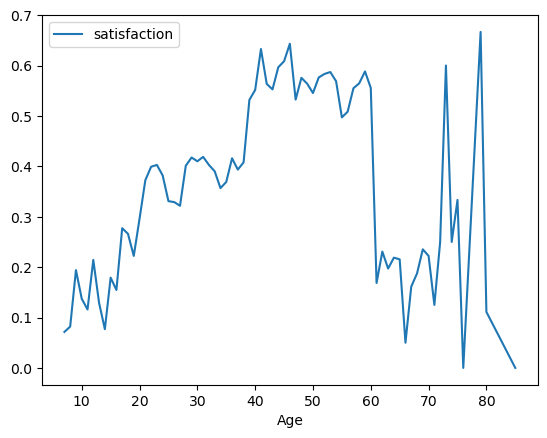

In [19]:
data[['Age','satisfaction']].groupby(['Age']).mean().plot()

In [20]:
X = data.drop('satisfaction',axis=1)
y = data['satisfaction']

In [21]:
data.isna().sum()

id                                    0
Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure/Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On-board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             26
satisfaction                          0
dtype: int64

In [22]:
data.dropna(inplace=True)

In [23]:
data.isna().sum()

id                                   0
Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [24]:
sc=StandardScaler()
print(sc)

StandardScaler()


In [25]:
X=sc.fit_transform(X)
print(X)

[[ 0.1395285   1.0218384  -0.46772753 ...  1.31096611  0.26728876
   0.07106403]
 [-1.60089591  1.0218384   2.13799688 ... -1.71701889 -0.36072705
  -0.23814858]
 [ 1.20465487 -0.97862832 -0.46772753 ...  1.31096611 -0.38689438
  -0.39275488]
 ...
 [-1.36010936 -0.97862832 -0.46772753 ... -0.96002264 -0.38689438
  -0.39275488]
 [ 1.30674195  1.0218384  -0.46772753 ...  1.31096611 -0.36072705
  -0.10930999]
 [-1.68593285 -0.97862832 -0.46772753 ...  0.55396986 -0.38689438
  -0.39275488]]


In [26]:
data.Flight_Distance.unique()

array([ 460,  235, 1142, ..., 3033, 1319, 1443], dtype=int64)

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [28]:
print("Training data shape (X_train):", X_train.shape)
print("Training target shape (y_train):", y_train.shape)
print("Testing data shape (X_test):", X_test.shape)
print("Testing target shape (y_test):", y_test.shape)

Training data shape (X_train): (8000, 23)
Training target shape (y_train): (8000,)
Testing data shape (X_test): (2000, 23)
Testing target shape (y_test): (2000,)


In [29]:
#model=tree.DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=2,min_samples_split=0.1,min_samples_leaf=1,min_weight_fraction_leaf=0.3,max_features='auto',random_state=1)

In [30]:
model=tree.DecisionTreeClassifier()

In [31]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
print("Hyperparameter : ", model.get_params())
model.score(X_train,y_train)

Hyperparameter :  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


0.9885

In [33]:
#model.fit(X_test,y_test)

In [34]:
model.score(X_test,y_test)

0.9255

In [35]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("pricison_score: ",precision_score(y_test, y_pred)*100,"%")
print("recall_score: ",recall_score(y_test, y_pred)*100,"%")
print("Accuracy = {}".format(accuracy*100),"%")
print(classification_report(y_test,y_pred,digits=5))
print(confusion_matrix(y_test,y_pred))
print("="*70)
print("f1_score: ",f1_score(y_test,y_pred)*100,"%")


pricison_score:  91.1214953271028 %
recall_score:  91.44196951934349 %
Accuracy = 92.55 %
              precision    recall  f1-score   support

           0    0.93619   0.93374   0.93496      1147
           1    0.91121   0.91442   0.91281       853

    accuracy                        0.92550      2000
   macro avg    0.92370   0.92408   0.92389      2000
weighted avg    0.92554   0.92550   0.92552      2000

[[1071   76]
 [  73  780]]
f1_score:  91.28145114101814 %


In [37]:
model=tree.DecisionTreeClassifier(criterion='entropy',
                                 splitter='best',
                                 max_depth=8,
                                 min_samples_split=0.1,
                                 min_samples_leaf=1,
                                 min_weight_fraction_leaf=0.3,
                                 random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("pricison_score: ",precision_score(y_test, y_pred)*100,"%")
print("recall_score: ",recall_score(y_test, y_pred)*100,"%")
print("Accuracy = {}".format(accuracy*100),"%")
print(classification_report(y_test,y_pred,digits=5))
print(confusion_matrix(y_test,y_pred))
print("="*70)
print("f1_score: ",f1_score(y_test,y_pred)*100,"%")

pricison_score:  71.60883280757098 %
recall_score:  79.8358733880422 %
Accuracy = 77.9 %
              precision    recall  f1-score   support

           0    0.83603   0.76460   0.79872      1147
           1    0.71609   0.79836   0.75499       853

    accuracy                        0.77900      2000
   macro avg    0.77606   0.78148   0.77686      2000
weighted avg    0.78488   0.77900   0.78007      2000

[[877 270]
 [172 681]]
f1_score:  75.49889135254988 %


In [38]:
model=tree.DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("pricison_score: ",precision_score(y_test, y_pred)*100,"%")
print("recall_score: ",recall_score(y_test, y_pred)*100,"%")
print("Accuracy = {}".format(accuracy*100),"%")
print(classification_report(y_test,y_pred,digits=5))
print(confusion_matrix(y_test,y_pred))
print("="*70)
print("f1_score: ",f1_score(y_test,y_pred)*100,"%")

pricison_score:  92.49394673123487 %
recall_score:  89.5662368112544 %
Accuracy = 92.45 %
              precision    recall  f1-score   support

           0    0.92419   0.94595   0.93494      1147
           1    0.92494   0.89566   0.91007       853

    accuracy                        0.92450      2000
   macro avg    0.92457   0.92080   0.92250      2000
weighted avg    0.92451   0.92450   0.92433      2000

[[1085   62]
 [  89  764]]
f1_score:  91.00655151876116 %


In [39]:
model=tree.DecisionTreeClassifier(criterion='entropy',max_depth=7)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("pricison_score: ",precision_score(y_test, y_pred)*100,"%")
print("recall_score: ",recall_score(y_test, y_pred)*100,"%")
print("Accuracy = {}".format(accuracy*100),"%")
print(classification_report(y_test,y_pred,digits=5))
print(confusion_matrix(y_test,y_pred))
print("="*70)
print("f1_score: ",f1_score(y_test,y_pred)*100,"%")

pricison_score:  93.14565483476133 %
recall_score:  89.21453692848769 %
Accuracy = 92.60000000000001 %
              precision    recall  f1-score   support

           0    0.92223   0.95118   0.93648      1147
           1    0.93146   0.89215   0.91138       853

    accuracy                        0.92600      2000
   macro avg    0.92684   0.92166   0.92393      2000
weighted avg    0.92617   0.92600   0.92577      2000

[[1091   56]
 [  92  761]]
f1_score:  91.13772455089821 %


In [40]:
from sklearn.model_selection import GridSearchCV

param_grid={'max_depth':[None,3,4,5,6,7,8,10,12]}
model=tree.DecisionTreeClassifier(criterion='entropy')
grid_search=GridSearchCV(model,param_grid, cv=5)
grid_search.fit(X_train,y_train)
best_max_depth=grid_search.best_params_['max_depth']
print(best_max_depth)


8


In [41]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [42]:
grid_search.best_score_*100

92.7875

In [43]:
grid_search.classes_


array([0, 1])

In [44]:
grid_search.cv

5

In [45]:
grid_search.cv_results_

{'mean_fit_time': array([0.05571518, 0.01876383, 0.02515697, 0.03010144, 0.03276215,
        0.03986888, 0.04191809, 0.04752779, 0.05329227]),
 'std_fit_time': array([0.00172137, 0.00066656, 0.00116518, 0.00266074, 0.00076223,
        0.00383251, 0.00142213, 0.00126979, 0.00271648]),
 'mean_score_time': array([0.00098906, 0.00059977, 0.00100803, 0.00102668, 0.00122066,
        0.00119858, 0.00100169, 0.00099797, 0.00119572]),
 'std_score_time': array([4.89513697e-05, 4.89734224e-04, 4.50352438e-06, 4.55306831e-05,
        4.00024868e-04, 4.04722189e-04, 1.72980854e-06, 5.31496994e-06,
        4.03265709e-04]),
 'param_max_depth': masked_array(data=[None, 3, 4, 5, 6, 7, 8, 10, 12],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': None},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
 

In [46]:
grid_search.n_features_in_

23

In [47]:
grid_search.predict_proba

<bound method BaseSearchCV.predict_proba of GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [None, 3, 4, 5, 6, 7, 8, 10, 12]})>

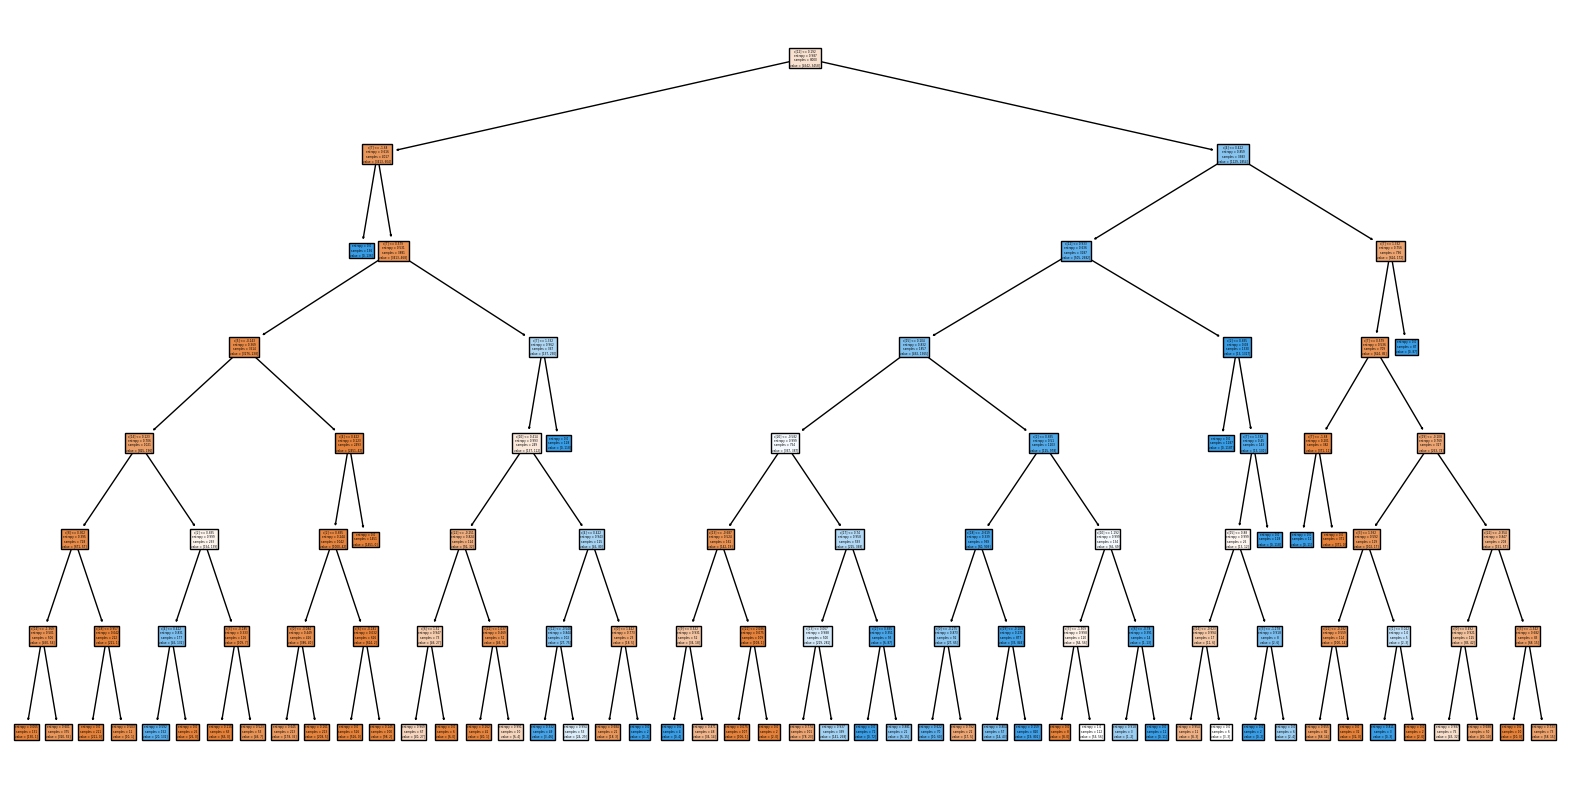

In [58]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # You can adjust the figure size as needed
plot_tree(model, filled=True, feature_names=None)
plt.show()

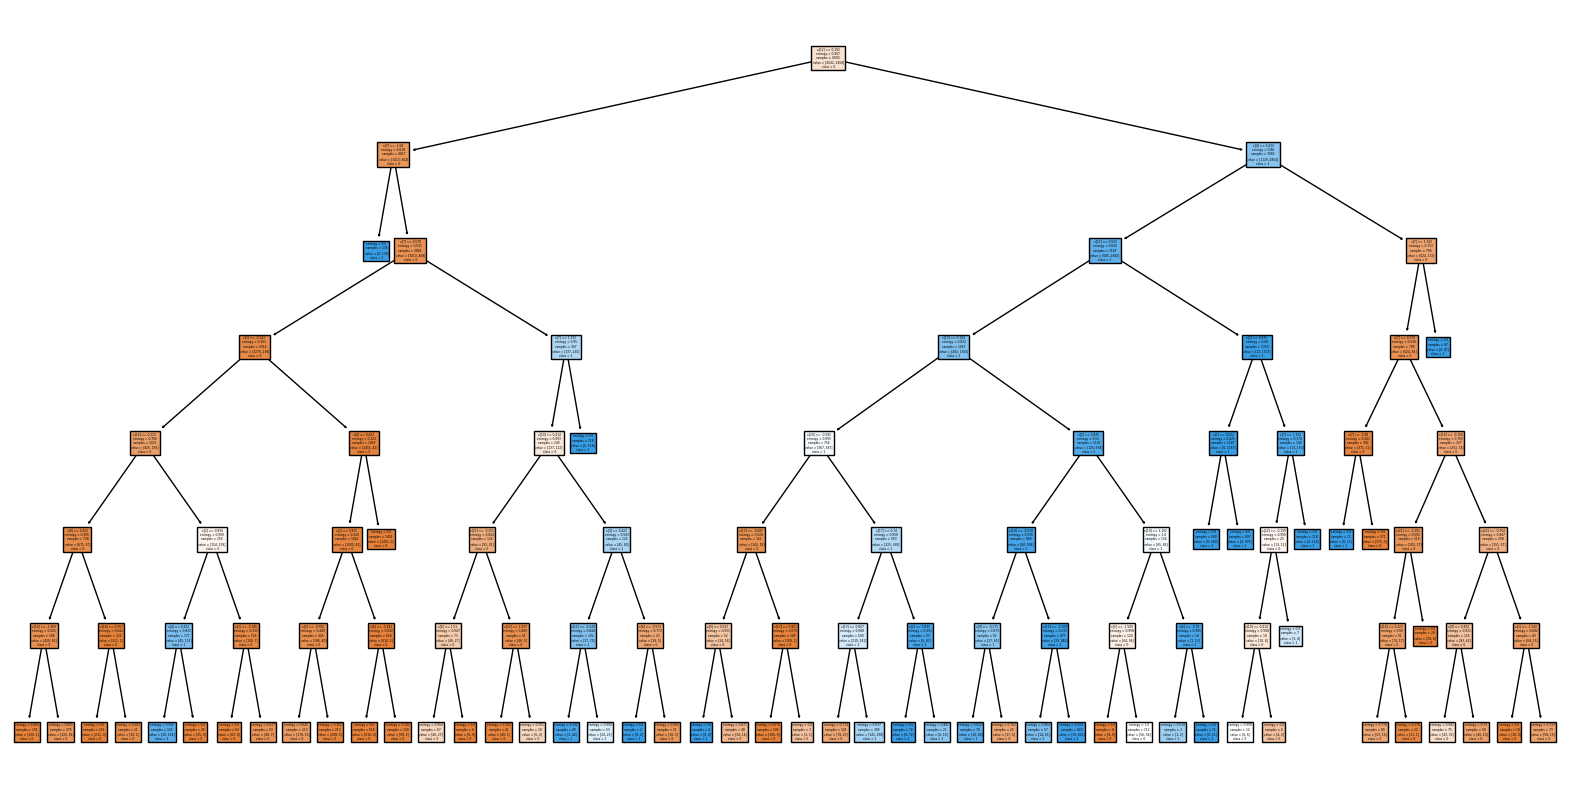

In [63]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming you have already trained your decision tree model as in your code
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)
model.fit(X_train, y_train)

# Specify class names for better visualization
class_names = [str(class_label) for class_label in model.classes_]

# Plot the decision tree with feature names
plt.figure(figsize=(20, 10))  # You can adjust the figure size as needed
plot_tree(model, filled=True, feature_names=None, class_names=class_names)
plt.savefig('decision_tree.png')  # You can change the file format (e.g., .png, .jpg, .svg, etc.)
plt.show()


# regressor

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have already trained your DecisionTreeRegressor model as in your code
model = DecisionTreeRegressor(criterion='squared_error', max_depth=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2*100, "%")
print("=" * 70)


Mean Squared Error (MSE): 0.054709478265772174
Mean Absolute Error (MAE): 0.1022980942440589
R-squared (R2) Score: 77.63287754455133 %


In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have already trained your DecisionTreeRegressor model as in your code
model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2*100, "%")
print("=" * 70)


Mean Squared Error (MSE): 0.05210560997676039
Mean Absolute Error (MAE): 0.09870504897302554
R-squared (R2) Score: 78.69742874709175 %


In [74]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have already trained your DecisionTreeRegressor model as in your code
model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2*100, "%")
print("=" * 70)


Mean Squared Error (MSE): 0.05248796805869379
Mean Absolute Error (MAE): 0.09993780082841185
R-squared (R2) Score: 78.54110757000267 %
